Q1. Research and compare different configuration management tools (Ansible,
Puppet, Chef) and write a report on their use cases and advantages?


**Ans** :- Configuration Management (CM) tools help automate the deployment, configuration, and management of infrastructure. The most commonly used tools are Ansible, Puppet, and Chef. Each has distinct architecture, language, and use cases.

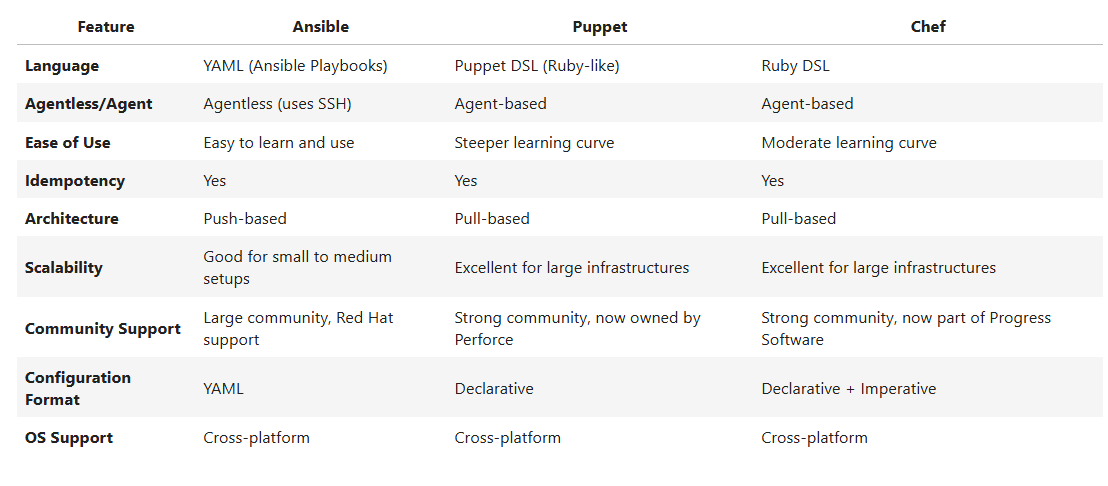

Use Cases and Advantages Ansible

- Use Cases:

- Small to medium-scale automation

- Ad hoc configuration and deployment

- Cloud provisioning (AWS, Azure, GCP)

Advantages:

- Agentless (no need to install agents)

- Simple YAML syntax

- Easier for beginners and DevOps teams

- Good integration with CI/CD tools

Puppet

- Use Cases:

- Large-scale enterprise environments

- Infrastructure with complex compliance needs

Advantages:
- Mature product with strong enterprise features

- Rich reporting and auditing

- Strong role-based access control (RBAC)

- Scalable and highly structured

Chef

- Use Cases:

- Complex application deployments

- Organizations already using Ruby

Advantages:

- Highly customizable

- Powerful scripting with Ruby

- Strong test-driven infrastructure support (ChefSpec, InSpec)

Q2. Extend the CI pipeline to include continuous delivery using Jenkins or
GitLab CI. Implement a blue-green deployment strategy?

**Ans** :- Extend a Continuous Integration (CI) pipeline to support Continuous Delivery (CD) with Blue-Green Deployment using Jenkins (or GitLab CI).

What is Blue-Green Deployment? Blue-Green Deployment is a technique where two identical environments (Blue and Green) are maintained. At any point:

- One (e.g., Blue) is live.

- The other (Green) is used for deployment/testing.

-  tested, traffic is switched to the Green environment.

Pipeline Components

- Source Control: GitHub / GitLab

- CI/CD Tool: Jenkins or GitLab CI

- Infrastructure: Docker, Kubernetes, or Virtual Machines

- Load Balancer: Nginx, HAProxy, or cloud-native LB

In [ ]:
# Steps in Jenkins Pipeline

#Checkout Code:
stage('Checkout') {
    steps {
        git 'https://github.com/your-repo.git'
    }
}

# Build Docker Image:
stage('Build Image') {
    steps {
        sh 'docker build -t app:${BUILD_NUMBER} .'
    }
}

# Deploy to Green Environment:
stage('Deploy to Green') {
    steps {
        sh './deploy-green.sh'  // deploys to the green instance
    }
}

# Run Integration Tests:
stage('Test') {
    steps {
        sh './test-green.sh'
    }
}

# Switch Load Balancer:
stage('Switch LB') {
    steps {
        sh './switch-lb.sh'  // updates Nginx or HAProxy to point to green
    }
}


In [ ]:
# GitLab CI Equivalent Example

stages:
  - build
  - deploy
  - test
  - switch
  - cleanup

build:
  stage: build
  script:
    - docker build -t app:$CI_PIPELINE_ID .

deploy:
  stage: deploy
  script:
    - ./deploy-green.sh

test:
  stage: test
  script:
    - ./test-green.sh

switch:
  stage: switch
  script:
    - ./switch-lb.sh

cleanup:
  stage: cleanup
  script:
    - ./cleanup-blue.sh
